<a href="https://colab.research.google.com/github/vpn12697/MyFirstRepository/blob/main/Titanic_Survival_Prediction_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex
Age	Age in years
sibsp	# of siblings / spouses aboard the Titanic
parch	# of parents / children aboard the Titanic
ticket	Ticket number
fare	Passenger fare
cabin	Cabin number
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable N


In [1]:
#connect drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libreries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [3]:
#load the data set
titanic_data = pd.read_csv('/content/drive/MyDrive/DATA/train.csv')

In [4]:
#print top 5 rows of titanic dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#check number of rows and column
titanic_data.shape

(891, 12)

Number of rows = 891
Number of columns = 12

In [6]:
# getting some information about data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB




1.   Embarked - 2 values are missing
2.   Age - 177 values are missing
3.   Cabin - 687 values are missing







In [7]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# we are dropping the cabin column because most of the data are missing
titanic_data = titanic_data.drop(columns='Cabin',axis=1)

In [9]:
# replacing missing value of age column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean,inplace = True)

<ipython-input-9-bf94c213549a>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<bound method Series.mean of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  titanic_data['Age'].fillna(titanic_data['Age'].mean,inplace = True)


In [10]:
# finding mode value of Embarked column
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
#replace missing value with mode
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace = True)


In [12]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


**Data Analysis**

In [13]:
# Starical measure of the titanic_data
titanic_data.describe()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,8.000000,6.000000,512.329200


In [14]:
# finding the number of people are survied and not survied
titanic_data['Survived'].value_counts()

,count
Survived,
0,549
1,342


**Data Visulization**

<Axes: xlabel='Survived', ylabel='count'>

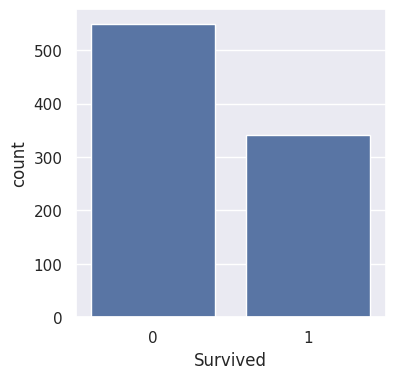

In [15]:
# making a count plot for surving data
sns.set()
plt.figure(figsize=(4,4))

sns.countplot(x ='Survived', data=titanic_data)

In [16]:
#nmber of survival of male and female
titanic_data['Sex'].value_counts()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

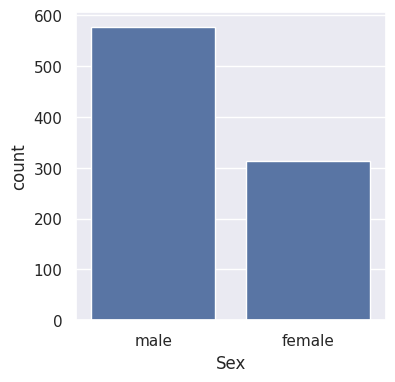

In [17]:
plt.figure(figsize=(4,4))
sns.countplot(x = 'Sex', data = titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

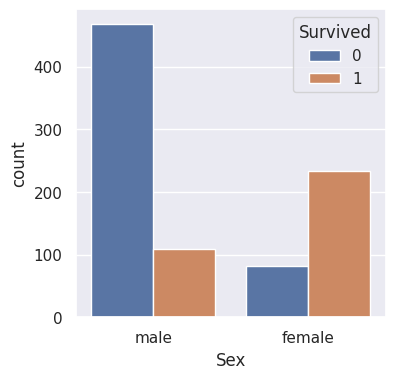

In [18]:
# comprision between survived and non-survived
plt.figure(figsize=(4,4))
sns.countplot(x = 'Sex',hue = 'Survived', data = titanic_data)


<Axes: xlabel='Pclass', ylabel='count'>

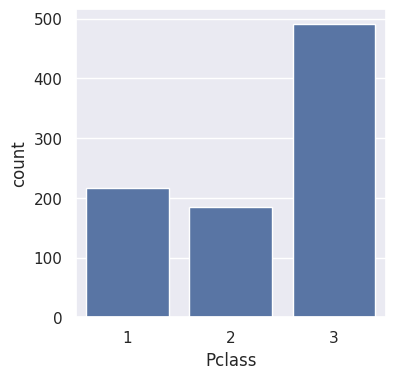

In [19]:
# count of Pclass
plt.figure(figsize=(4,4))
sns.countplot(x = 'Pclass', data = titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

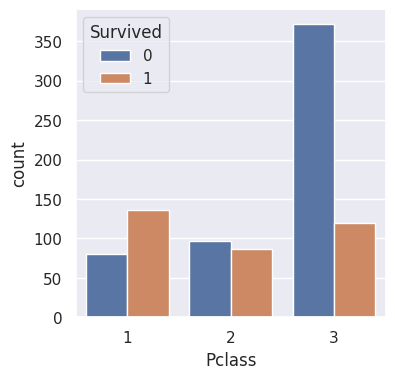

In [20]:
# Pclass survival passengers
plt.figure(figsize=(4,4))
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_data)

**Encoding the categorical columns**

In [21]:
# converting categorical columns
titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

In [22]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


**Seprating Features and Target**

In [23]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis =1)
Y = titanic_data['Survived']

In [24]:
print(X.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         0
1       1    1  38.0      1      0  71.2833         1
2       3    1  26.0      0      0   7.9250         0
3       1    1  35.0      1      0  53.1000         0
4       3    0  35.0      0      0   8.0500         0


In [25]:
print(Y.head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


**Splitting the data into training and testing dataset**

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(891, 7) (712, 7) (179, 7)


In [28]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
Y_train = pd.to_numeric(Y_train, errors='coerce')

In [29]:
X_train = X_train.fillna(0)
Y_train = Y_train.fillna(0)

**Model Training (Logistic_Regression)**


In [30]:
model = LogisticRegression()

In [31]:
#training logistic_regression model with training data
model.fit(X_train,Y_train)

LogisticRegression()

**Model Evolution (accuracy score)**

In [32]:
# Accuracy of training data
X_train_prediction = model.predict(X_train)


In [33]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 1 0 1 1 1 1 0 

In [34]:
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data :',training_data_accuracy)

Accuracy score of training data : 0.8061797752808989


In [36]:
X_test = X_test.apply(pd.to_numeric, errors='coerce')
#Y_train = pd.to_numeric(Y_train, errors='coerce')
X_test = X_test.fillna(0)
#Y_train = Y_train.fillna(0)

In [37]:
# Accuracy of test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of test data :',test_data_accuracy)

Accuracy score of test data : 0.776536312849162
